In [1]:
import mne #import biblioteki mne
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d_path = "eeg_files/20241017_kp.bdf" #ścieżka do pliku z danymi
ch_eog = ["EXG1","EXG2"] #zewnętrzne kanały mierzące ruchy gałek ocznych
ch_ecg = ["EXG3","EXG4"] #zewnętrzne kanały mierzące aktywność serca
ch_exclude = [f"EXG{i}" for i in range(5,9)] 

In [3]:
raw = mne.io.read_raw_bdf(
    d_path, preload=True, eog=ch_eog, misc=ch_ecg, exclude=ch_exclude #wczytanie surowych danych
    )

raw.set_montage("biosemi64")

Extracting EDF parameters from /Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/eeg_files/20241017_kp.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2928639  =      0.000 ...  1430.000 secs...


<RawEDF | 20241017_kp.bdf, 69 x 2928640 (1430.0 s), ~1.51 GiB, data loaded>

In [4]:
notch = 50
bandpass_low = 0.1
bandpass_high = 40
raw.filter(bandpass_low,bandpass_high)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 67585 samples (33.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


<RawEDF | 20241017_kp.bdf, 69 x 2928640 (1430.0 s), ~1.51 GiB, data loaded>

In [5]:
eeg_ch_idx = mne.pick_types(raw.info,eeg=True,exclude=['Fp1', 'Fp2', 'Fpz',
    'AF3', 'AF4', 'AF7', 'AF8', 'AFz',
    'F3', 'F4', 'F7', 'F8', 'Fz',
    'F1', 'F2', 'F5', 'F6'])

all_ch_names = raw.info["ch_names"]
eeg_ch_names = [all_ch_names[i] for i in eeg_ch_idx]


In [25]:
eeg_data =raw.get_data(picks=eeg_ch_idx,units="uV")
eeg_var = np.var(eeg_data,axis=1)
median = np.median(eeg_data,axis=1)
mean = np.mean(eeg_data,axis=1)
median_std = np.median(eeg_std)

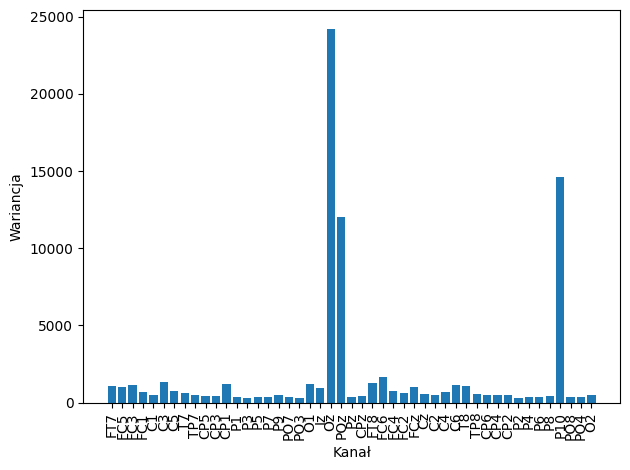

In [29]:
plt.bar(eeg_ch_names,eeg_var)
plt.xlabel("Kanał")
plt.ylabel("Wariancja")
plt.xticks(rotation=90)
plt.tight_layout()